In [1]:
#importing the required lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
test_df=pd.read_csv('test.csv')
train_df=pd.read_csv('train.csv')
train_df.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [3]:
train_df.dropna(inplace=True)

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 0 to 699
Data columns (total 2 columns):
x    699 non-null float64
y    699 non-null float64
dtypes: float64(2)
memory usage: 16.4 KB


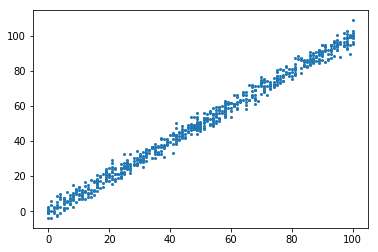

In [5]:
#vizuvalization of data
plt.scatter(train_df['x'],train_df['y'],s=4)

In [6]:
X = train_df["x"].values.reshape(-1,1)
Y = train_df["y"].values.reshape(-1,1)

In [7]:
from sklearn.model_selection import train_test_split

X_train,X_cv, y_train, y_cv = train_test_split(X,Y,test_size=0.3, random_state=143)

In [8]:
#fitting a linear regression model using the training data
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
some_data =X_train[0:5]
some_labels=y_train[0:5]
print(lin_reg.predict(some_data))
print(lin_reg.predict(some_labels))

[[33.76440245]
 [63.88885236]
 [17.69802917]
 [16.69388084]
 [21.71462249]]
[[30.23866616]
 [66.63485743]
 [20.92457825]
 [12.92824053]
 [18.26277616]]


In [10]:
#root mean squared error
from sklearn.metrics import mean_squared_error
predictions=lin_reg.predict(X_train)
mse=mean_squared_error(y_train,predictions)
rmse=np.sqrt(mse)
rmse

2.7396101133706083

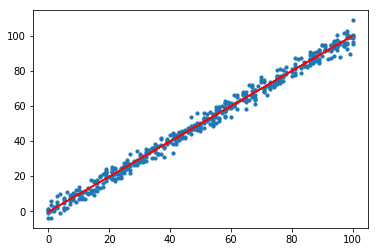

In [11]:
#Vizuvilization the red dot is the fitting line of the data. the scattered data is the cross validation data
plt.scatter(X_train,y_train,s=10)
plt.plot(X_train,predictions,color='red')
plt.show()

In [12]:
#we find root mean squared error using the cross validation data
cv_prediction=lin_reg.predict(X_cv)
cv_mse=mean_squared_error(y_cv,cv_prediction)
cv_rmse=np.sqrt(cv_mse)
cv_rmse

2.962299120833467

In [13]:
test_df.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [14]:
#importing test data
X_test=test_df['x'].values.reshape(-1,1)
y_test=test_df['y'].values.reshape(-1,1)

In [15]:
#final predictions
final_predictions=lin_reg.predict(X_test)
final_mse=mean_squared_error(y_test,final_predictions)
final_rmse=np.sqrt(final_mse)
final_rmse

3.0718788245091995

In [16]:
#checking r2 score
from sklearn.metrics import r2_score
score=r2_score(y_test,final_predictions)
score

0.9887972687481205

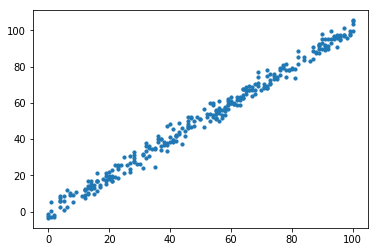

In [17]:
plt.scatter(test_df['x'],test_df['y'],s=10)
plt.show()

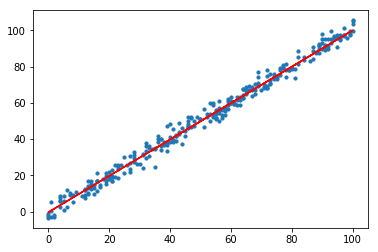

In [18]:
plt.scatter(test_df["x"],test_df["y"],s=10)
plt.plot(X_train, predictions, color='red')
plt.savefig("final_graph.jpg")